In [1]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

%matplotlib inline

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
root = nc.Dataset('prod_latlon_merged_2017.nc')

In [3]:
time = root.variables['time']
latitude = root.variables['latitude']
longitude = root.variables['longitude']
ice_area = root.variables['ice_area']

In [3]:
root.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: days since 1990-01-01T00:00:00Z
                  long_name: julian day (UT)
                  standard_name: time
                  conventions: Relative julian days
                  axis: T
              unlimited dimensions: 
              current shape = (12,)
              filling on, default _FillValue of -2147483647 used),
             ('longitude', <class 'netCDF4._netCDF4.Variable'>
              float64 longitude(longitude)
                  long_name: longitude
                  standard_name: longitude
                  units: degree_east
                  valid_min: -180
                  valid_max: 180
                  axis: X
              unlimited dimensions: 
              current shape = (181,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float64 

In [5]:
root.dimensions

OrderedDict([('time',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 12),
             ('longitude',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 181),
             ('latitude',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 51)])

In [9]:
time

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: days since 1990-01-01T00:00:00Z
    long_name: julian day (UT)
    standard_name: time
    conventions: Relative julian days
    axis: T
unlimited dimensions: 
current shape = (12,)
filling on, default _FillValue of -2147483647 used

In [10]:
latitude

<class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    long_name: latitude
    standard_name: latitude
    units: degree_north
    valid_min: -90
    valid_max: 90
    axis: Y
unlimited dimensions: 
current shape = (51,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [11]:
longitude

<class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    long_name: longitude
    standard_name: longitude
    units: degree_east
    valid_min: -180
    valid_max: 180
    axis: X
unlimited dimensions: 
current shape = (181,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [7]:
latitude[:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


masked_array(data=[-90., -89., -88., -87., -86., -85., -84., -83., -82.,
                   -81., -80., -79., -78., -77., -76., -75., -74., -73.,
                   -72., -71., -70., -69., -68., -67., -66., -65., -64.,
                   -63., -62., -61., -60., -59., -58., -57., -56., -55.,
                   -54., -53., -52., -51., -50., -49., -48., -47., -46.,
                   -45., -44., -43., -42., -41., -40.],
             mask=False,
       fill_value=1e+20)

In [8]:
longitude[:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


masked_array(data=[  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,
                    18.,  20.,  22.,  24.,  26.,  28.,  30.,  32.,  34.,
                    36.,  38.,  40.,  42.,  44.,  46.,  48.,  50.,  52.,
                    54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
                    72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,
                    90.,  92.,  94.,  96.,  98., 100., 102., 104., 106.,
                   108., 110., 112., 114., 116., 118., 120., 122., 124.,
                   126., 128., 130., 132., 134., 136., 138., 140., 142.,
                   144., 146., 148., 150., 152., 154., 156., 158., 160.,
                   162., 164., 166., 168., 170., 172., 174., 176., 178.,
                   180., 182., 184., 186., 188., 190., 192., 194., 196.,
                   198., 200., 202., 204., 206., 208., 210., 212., 214.,
                   216., 218., 220., 222., 224., 226., 228., 230., 232.,
                   234., 236., 238., 240., 242., 24

In [9]:
ice_area

<class 'netCDF4._netCDF4.Variable'>
float32 ice_area(time, longitude, latitude)
    long_name: mean area of iceberg
    units: km2
    valid_min: 0.0
    valid_max: 100.0
    _FillValue: 9.96921e+36
    content: TYX
    associates: time latitude longitude
unlimited dimensions: 
current shape = (12, 181, 51)
filling on

In [22]:
for name in root.ncattrs():
    print(name)

source
project
authors
contact
southernmost_latitude
northernmost_latitude
latitude_resolution
westernmost_longitude
easternmost_longitude
longitude_resolution
start_date
stop_date
field_type
sensor


In [5]:
print(ice_area.units)
print(ice_area.shape)
print(ice_area.dimensions)

km2
(12, 181, 51)
('time', 'longitude', 'latitude')


# Ice Area Data

In [4]:
# data has nan as well as 0 values
ice_area[0,75,:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


masked_array(data=[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                    0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                    0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                    0.,  0.,  0.,  0.,  0.,  0.,  0.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

### Overview

latitude is -90 to -40  
longitude - 0 to 360 with 2 degrees precision  
    I am subtracting 180 from this to get the correct longitude? will check the documentation on this
B30 is currently at -63, -141
A lot of the data is nan, but there is 

In [5]:
ice2d = ice_area[2,:,:].data
ice2d = np.swapaxes(ice2d, 0, 1)
ice2d

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
lonvals = longitude[:].data
latvals = latitude[:].data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  


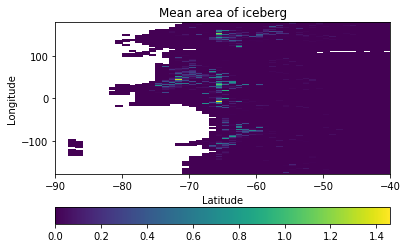

In [24]:
plt.pcolor(latvals, lonvals, ice2d)

plt.xlabel(latitude.standard_name.capitalize())
plt.ylabel(longitude.standard_name.capitalize())
plt.title(ice_area.long_name.capitalize())
plt.colorbar(orientation="horizontal")

### Plot onto basemap to make sense of the data

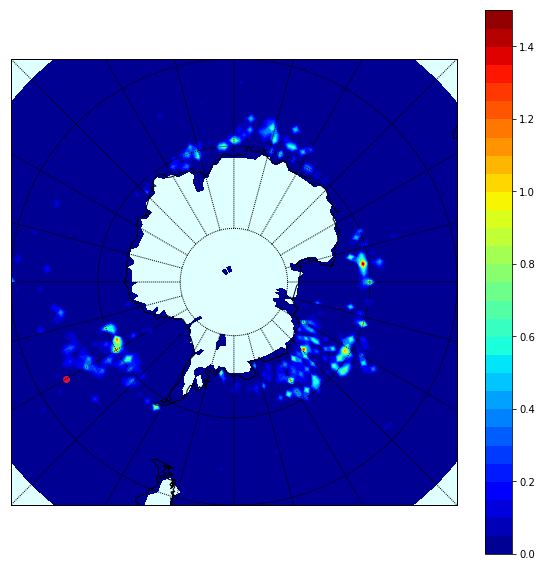

In [7]:
# Useful south pole stereographic link
# Shows how to plot points as well
#https://stackoverflow.com/questions/45302485/matplotlib-focus-on-specific-lon-lat-using-spstere-projection

# create a map
plt.figure(figsize=(10,10))
m = Basemap(projection = 'spstere', boundinglat = -50, lon_0 = 270)
sea_color = 'lightcyan'

# set any desired features
m.drawcoastlines()
m.drawmapboundary(fill_color = sea_color)
m.drawparallels(np.arange(-80, 81, 15))
m.drawmeridians(np.arange(-180, 180, 15))

x, y = m(*np.meshgrid(lonvals, latvals))

# make filled contour plot.`
m.contourf(x, y, ice2d, 30, cmap = plt.cm.jet)
plt.colorbar(orientation="vertical")

xll, yll = m(-65,-138) # <-- find those points by looking at meridians and parallels
xur, yur = m(-30,-55)
m.scatter([xll,xur], [yll, yur], c="crimson")

plt.show()

In [51]:
latvals

array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80.,
       -79., -78., -77., -76., -75., -74., -73., -72., -71., -70., -69.,
       -68., -67., -66., -65., -64., -63., -62., -61., -60., -59., -58.,
       -57., -56., -55., -54., -53., -52., -51., -50., -49., -48., -47.,
       -46., -45., -44., -43., -42., -41., -40.])

In [52]:
lonvals

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198., 200., 202., 204., 206., 208., 210., 212., 214., 216., 218.,
       220., 222., 224., 226., 228., 230., 232., 234., 236., 238., 240.,
       242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284.,
       286., 288., 290., 292., 294., 296., 298., 30